[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiptos/is_notes/blob/main/logistic_regression.ipynb)

# Logistic Regression

Linear regression is used for estimation or prediction. However, despite the name, logistic regression is used for classification, a problem of completely different nature.

## Binary classification

Binary classification implies that the target variable can assume two values:

$$y \in [0,1] \rightarrow \left\{ \begin{array}{l}
                                      \text{0: negative class} \\
                                      \text{1: positive class}
        \end{array} \right.$$
        
Logistic regression allows us to generate a probability of an object (the feature vector) to belong to a given class.

Since we are looking for a probability, we would like to have a representation such that $0 \leq h_\theta(x) \leq 1$.

For that, we can use the sigmoid function:

$$g(z)=\frac{1}{1+e^{-z}}$$

Represented by:

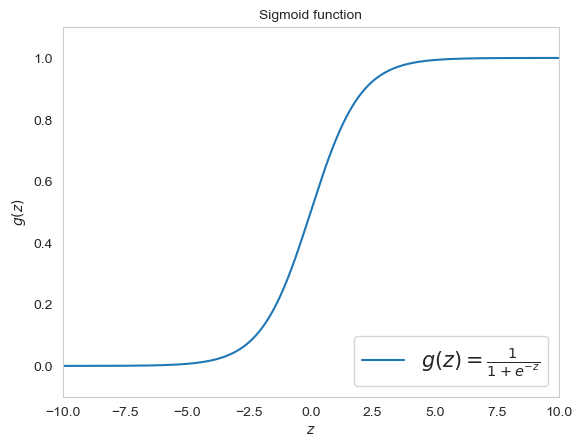

In [2]:
import matplotlib.pyplot as plt
import numpy as np

sigmoid = lambda x: 1/(1+np.exp(-x))

def plot_sigmoid():
  plt.grid()
  plt.xlim([-10.0, 10.0])
  plt.ylim([-0.1, 1.1])
  xs = np.arange(-10, 10, 0.001)
  plt.xlabel('$z$', size=10)
  plt.ylabel('$g(z)$', size=10)
  plt.title('Sigmoid function', size=10)
  plt.plot(xs, sigmoid(xs), label=r'$g(z)= \frac{1}{1+e^{-z}}$')
  plt.legend(loc='lower right', fontsize=15)

plot_sigmoid()

So, we can embedd the linear regression hypothesis ($\theta^Tx$) in the sigmoid function:

$$h_\theta(x) = g(\theta^T x) = \frac{1}{1+e^{-\theta^Tx}}$$

thus estimating the probability of $y=1$ for a given $x$ considering $\theta$:

$$h_\theta(x) = P(y=1|x;\theta)$$



Notice that

- the range of values that $g(z)$ produces is the open range $(0,1)$
- $g(0)$ is equal to $0.5$
- for ever-increasing $z$ values (in magnitude), $g(z)$ returns values ever closer to $0$ or $1$
- $g(z) \geq 0.5$ when $z \geq 0$
- $g(z) < 0.5$ when $z < 0$

In [3]:
print('g(0.0) = %.3f' % sigmoid(0.0))
print('g(0.5) = %.3f' % sigmoid(0.5))
print('g(-0.5) = %.3f' % sigmoid(-0.5))
print('g(10.0) = %.3f' %  sigmoid(10.0))
print('g(-10.0) = %.3f' % sigmoid(-10.0))

g(0.0) = 0.500
g(0.5) = 0.622
g(-0.5) = 0.378
g(10.0) = 1.000
g(-10.0) = 0.000


To give you a more concrete view of what a logistic regression model does, consider a binary classification problem over a training set with 2 predictors, $x_1$ and $x_2$. Also, consider that the logistic regression algorithm produced a model represented by the vector $\theta = [-3, 1, 1]$. The code cell below is a toy implementation of a logistic regression classifier.

In [4]:
import numpy as np

def sigmoid(x):
    # Sigmoid function
    return 1 / (1 + np.exp(-x))

def dot_product(theta, x):
    # Compute the weighted sum.
    return np.dot(x, theta)

def predict(theta, x):
    y_prob = proba(theta,x)
    return np.round(y_prob).astype(int)

def proba(theta, x):
    # Returns the probability that x belongs to the positive class
    return sigmoid(dot_product(theta, x))


Further, consider that we want to determine (predict) the class for the examples $[3,3]$ and $[0.4,1.3]$. The following code produces the probability value that $\mathbf{x}$ belongs to the positive class.

In [5]:
theta = np.asarray([-3, -1, -1]).T

X = np.asarray([[3, 3],[0.4, 1.3]])

print('Example(s):\n', X)

col = np.ones((2,1))
X = np.append(col, X, axis=1)

print('Predicted class(es) for each example:', predict(theta, X))
print('Probability of each example belonging to the positive class:', proba(theta, X))


Example(s):
 [[3.  3. ]
 [0.4 1.3]]
Predicted class(es) for each example: [0 0]
Probability of each example belonging to the positive class: [0.00012339 0.0090133 ]


In the example above:

1. How do you interpret the output when $\theta = [-3, 1, 1]$? 
2. What happens if you change $\theta$ to $[-3, -1, -1]$?
3. What happens if you keep $\theta = [-3, 1, 1]$ and try to classify the example $\mathbf{x}=[0.4,1.3]$?


## Decision boundaries

We can have a graphical intuition of the example above. Again, suppose $\theta = [-3, 1, 1]T$. Then to classify an example $\mathbf{x} = (x_1, x_2)$:

$$
\theta^T \cdot \mathbf{x} = [-3, 1, 1]^T \cdot [1,x_1,x_2] = -3 + x_1 + x_2
$$

Recall that, if $(\theta^T \cdot \mathbf{x}) \geq 0$, then $\mathbf{x}$ is classified as positive. That is:

$$
-3 + x_1 + x_2 \geq 0 \rightarrow x_1 + x_2 \geq 3
$$

The equation $x_1 + x_2 = 3$ actually defines what we call a *decision boundary*. According to the Wikipedia, the definition of a decision boundary is the following:

> In a classification problem with two classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.

In the case of a 2-dimensional dataset, as the space of predictors is bidimentional, the decision boundary is a simple line in the cartesian plane. This line splits the space of features in two subregions, positive and negative. See the plot below.


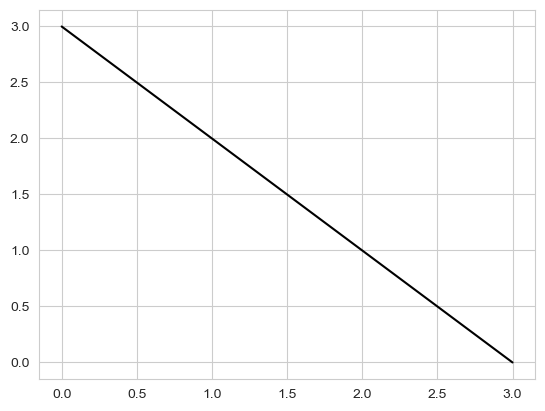

In [6]:
from matplotlib import pyplot as plt

point1 = [0, 3]
point2 = [3, 0]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

plt.plot(x_values, y_values, c='black')
plt.show()

In particular, all the examples that fall above this line are classified as being positive, while the examples predicted as negative are located below this line.

[0 0]


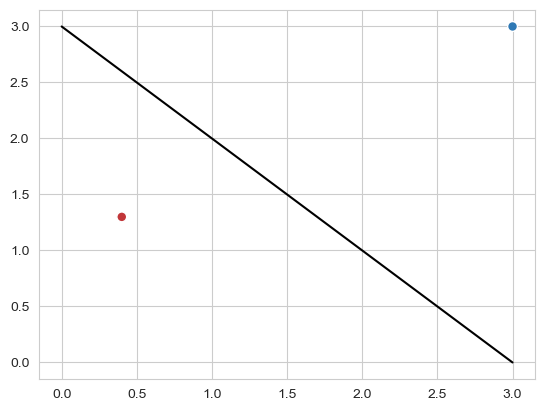

In [7]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array([
    [0.4, 1.3],
    [3, 3]
])

col = np.ones((2,1))
x = np.append(col, data, axis=1)

y_pred = predict(theta, x)
print(y_pred)

ax = plt.gca()
ax.scatter(data[:,0], data[:, 1], c=np.array([0,1]), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

plt.plot(x_values, y_values, c='black')
plt.show()

Let us draw the decision boundary defined by the vector $\theta = [-3, 1, 1]$ along with the examples in the toy dataset presented above.

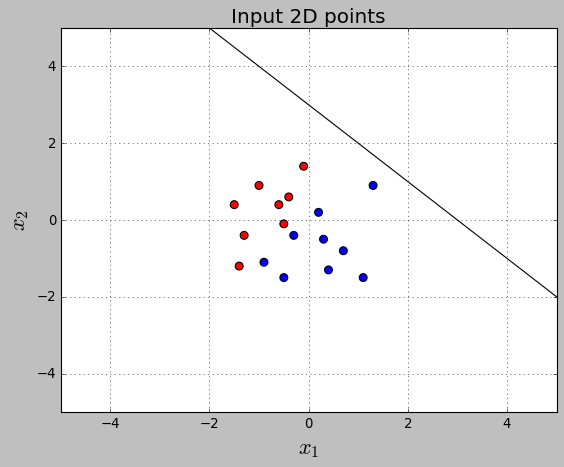

In [8]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[-0.1, 1.4],
              [-0.5,-0.1],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.5, 0.4],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5,-1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-1.1],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5]])

y = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap):
  plt.grid()
  plt.xlim([-5.0, 5.0])
  plt.ylim([-5.0, 5.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])

plot_scatter(X, y, colormap)

point1 = [-5, 8]
point2 = [5, -2]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

plt.plot(x_values, y_values, c='black')


By analysing the image above, it should be clear that the decision boundary defined by the vector $\theta = [-3, 1, 1]$ is **not** the best one, in the sense that it does not correctly classify many of the examples in the training dataset. In particular, the *prediction error* of the corresponding classifier is $8/17 \approx 47\%$, which is worst than tossing a coin to determine the class of an new example!

## Optimization problems

By now, you should understand that the goal in logistic regression is to find the components of the vector $\theta$, taking as input a data matrix $X$ and a response vector $y$. You should also understand that, from the infinitely many vectors $\theta$, we want to find the one that minimizes the prediction error of the corresponding model.

To determine the most appropriate parameter vector $\theta$, logistic regression must solve an optimization problem. An optimization problem is one in which, given a function, we want to find the point that corresponds to the optimal value (minimum or maximum) of the function.

As an illustration, the following code computes the minimum value of the function $f(x) = x^3 - 3x^2 + 7$ within the range $[3,500]$.


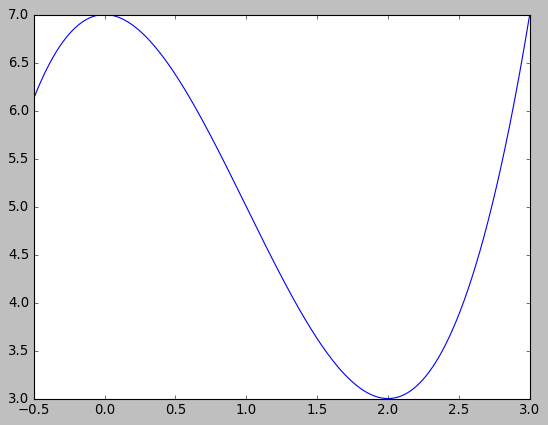

In [9]:
import numpy as np
import matplotlib.pyplot as plt

f1 = lambda x: (x ** 3)-(3 *(x ** 2))+7

# Get 1000 evenly spaced num bers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-0.5,3,500)

# Plot the curve
plt.plot(x, f1(x))
plt.show()

In [10]:
from scipy import optimize

result = optimize.minimize_scalar(f1)
print(result.success) # check if solver was successful

print('Minimum of function occurs at x = %.2f' % result.x)

True
Minimum of function occurs at x = 2.00


The concept of optimization is also applicable to functions of more than one variable.

In the following example, a function of two variables (a paraboloid in this case) is used to illustrate the optimization procedure.


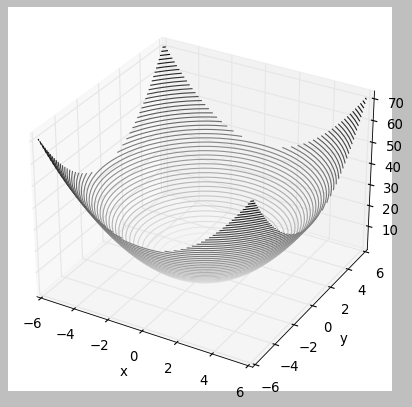

In [11]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def f_paraboloide(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f_paraboloide(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

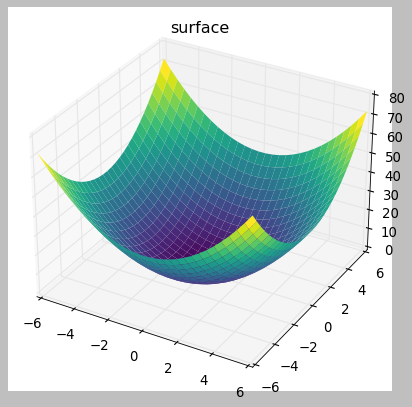

In [12]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [13]:
from scipy import optimize

def f2(x):
    return (x[0]**2 + x[1]**2)

optimize.minimize(f2, [2, -1], method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 5.8281095370852615e-15
       x: [-6.828e-08  3.414e-08]
     nit: 1
     jac: [-1.217e-07  8.318e-08]
    nfev: 9
    njev: 3

In general, optimization problems are difficult, because the function in question can be complex, as shown below.

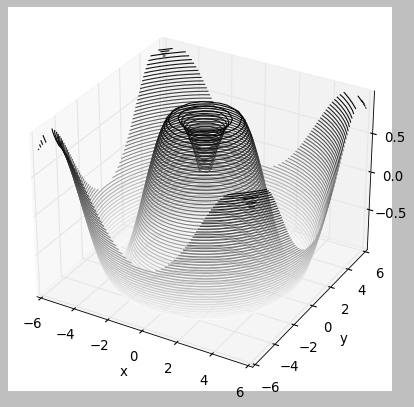

In [14]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Logistic regression has to solve an optimization problem to find the best vector of parameters given the training dataset. In particular, the type of optimization problem to be solved in the logistic regression is minimization: given a function $J(\Theta)$ that measures the error of the classification model on the training data, the objective is to find the combination of components of $\theta$ such that it produces the minimum value for $J(\Theta)$.

Consider a binary classification problem in which there are $m$ examples in the training set. Also, consider that $y^{(i)} \in \{0.1\}$ is the class associated with the $i$-th training example, and that $g(z_i)$ is the value of the sigmoid function corresponding to the $i$-th training example, $z_i = \theta^T \cdot \mathbf{x}^{(i)}$. The cost function that logistic regression must minimize is called *cross entropy loss* or *logistic loss*. Its definition is as follows:

$$
J(\theta) = -\frac{1}{m} \sum_{i = 1}^{m} [ y^{(i)} \log (g(z_i)) + (1-y^{(i)}) \log (1 - g(z_i))]
$$

To get an insight into the cost function above, let's consider the cost corresponding to the $i$-th training example:

$$
\text{cost}_i = y^{(i)} \log(g(z_i)) + (1-y^{(i)}) \log(1 - \sigma(z_i))
$$

In the above expression, note that the cost tends to zero when the the value values produced by the hypothesis $g(z_i)$ tends to the value of $y^{(i)}$ (ground thruth):

- $\left[(g(z_i) \rightarrow 0) \text{ and } (y^{(i)} = 0)\right] \Rightarrow (\text{cost}_i \rightarrow 0)$
- $\left[(g(z_i) \rightarrow  1) \text{ and } (y^{(i)} = 1)\right] \Rightarrow (\text{cost}_i \rightarrow 0)$

However, if the hypothesis predicts a different value compared to $y^{(i)}$, we have one of the following two cases:

- $\left[(g(z_i) \rightarrow 0) \text{ and } (y^{(i)} = 1)\right] \Rightarrow (\text{cost}_i \rightarrow \infty)$ 
- $\left[(g(z_i) \rightarrow 1) \text{ and } (y^{(i)} = 0)\right] \Rightarrow (\text{cost}_i \rightarrow \infty)$

The above analysis considers only the extreme values ​​that $\sigma(z_i)$ can take. In any case, the general conclusion we should draw is that the minimization algorithm is penalized when it selects a $\Theta$ vector that produces the wrong prediction for the $i$-th example.

The above explanation was given in the context of a single example. What the function $J(\Theta)$ does is to compute the *average error* over all $m$ training examples.


### Gradient Descent (and its variants)

One of the most used methods to numerically perform the minimization that the logistic regression needs is [gradient descent](en.wikipedia.org/wiki/Gradient_descent). Using this method, the process of minimizing the cost function occurs in an iterative way. At each iteration, a small change is made to the components of the $\Theta$ parameter vector:

Repeat until convergence: 
$$
\theta_j := \theta_j - \alpha \sum_{i = 1}^{m}(g(\theta^T \cdot \mathbf{x}^{(i)}) - y^{(i)}) \, x_j^{(i)}
$$

In the update expression presented above, $\alpha$ is a numerical value called *learning rate*. This constant controls the amount of update on the components of $\theta$.

There are numerous gradient-based optimization methods. The study of these methods is outside the scope of this course. In any case, the following animation ([source]((https://www.datasciencecentral.com/profiles/blogs/an-overview-of-gradient-descent-optimization-algorithms))) illustrates the behavior of some of these methods while minimizing a given function. notice how some of these methods manage to scape the local minima, while some others remain stuck in it.

![alt text](http://storage.ning.com/topology/rest/1.0/file/get/2808327843?profile=original)

The learning rate is a hyperparameter of logistic regression. The following animation (source: [Machine Learning Refined](https://github.com/jermwatt/machine_learning_refined)
) illustrates the effect of different learning rate values ​​on the optimization process. When $\alpha$ is defined as too large and the evaluation sequence starts to get out of control, the sequence of steps is said to diverge. On the other hand, if the value of $\alpha$ is very small, the convergence of the process can take significantly.

![alt text](https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/html/gifs/steplength_1D.gif?raw=true)


## Logistic Regression in Scikit-Learn

The cells below illustrate the use of the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class.

One of the parameters for instantiating the `LogisticRegression` class is called *solver*, which defines the optimization method to be used during training.

*example adapted from the book [Hands-on Machine Learning with Scikit-Learn and Tensoflow](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291).


In [15]:

from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0


In [16]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

The next code cell fits a logistic regression model to the training set.

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)


LogisticRegression()

Once the model has been generated, it is possible to invoke the predict method, as shown in the following example.

In [18]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

The following cell produces a graph that makes it easier to interpret the generated model. In this graph, the point where the solid and dashed curves meet corresponds to the decision boundary of the generated logistic regression model.

What is the decision boundary in this example?

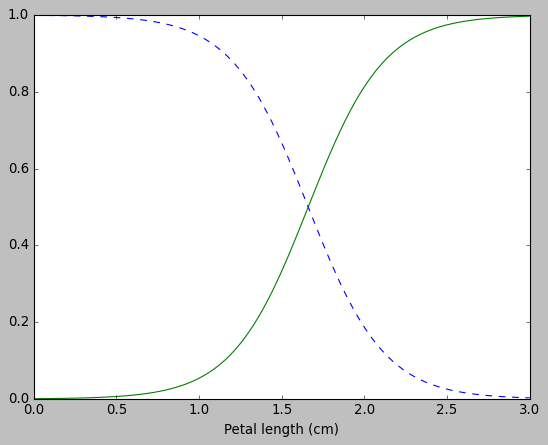

In [19]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

plt.xlabel('Petal length (cm)')
plt.show()


The vector of coefficients of the generated logistic regression model is stored in two different attributes of the LogisticRegression class: `coef_` and `intercept_`. See the code cell below.


In [20]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[4.333]]
[-7.195]


$$
\theta = [4.3, -7.19]
$$

By inspecting the above output, we can conclude that the decision boundary is:

$$
\theta_0 + \theta_1 \times x_1 = 0
$$

If we replace the values in the above equation, we get:

$$
4.33 - 7.19 \times x_1 = 0
$$

By a simple manipulation of the above expression, we can find that the decision boundary here is a vertical line that crosses $x_1 \approx 1.66$, which is consistent with the plot shown above.

In this example, notice that $x_1$ represents the only predictor used to generate the model, *petal length*.


7.19/4.33

## Case study: Toy dataset

Let us go back to our toy dataset and make build a decent classifier using Scikit-Learn. 


In [21]:
import numpy as np

X = np.array([[-0.1, 1.4],
              [-0.5,-0.1],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.5, 0.4],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5,-1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-1.1],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5]])

y = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)

LogisticRegression()

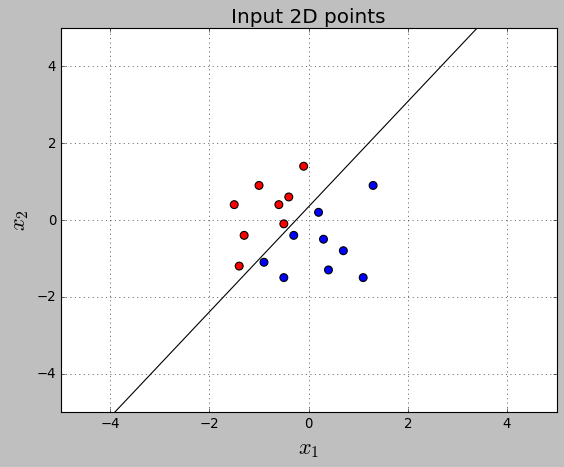

In [23]:
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap):
  plt.grid()
  plt.xlim([-5.0, 5.0])
  plt.ylim([-5.0, 5.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])

plot_scatter(X, y, colormap)

points_x = [x/10. for x in range(-50,+50)]

bias = log_reg.intercept_
w = log_reg.coef_.T
points_y = [-(w[0] * x + bias)/(w[1]) for x in points_x]
plt.plot(points_x, points_y, color = 'black')


## Case study: honor dataset

Let us see a complete example of creating a logistic regression model with Scikit-Learn on the honor dataset. This is a dataset that contains 200 observations about students. The feature we will use a target is `hon` which indicates if a student is an honor class or not.


In [24]:
import pandas as pd
df_honor_data = pd.read_csv('https://raw.githubusercontent.com/OmaymaS/Logistic-Regression-Coefficients-Interpretation/master/honordata.csv')
df_honor_data.head()

,female,read,write,math,hon,femalexmath
0,0,57,52,41,0,0
1,1,68,59,53,0,53
2,0,44,33,54,0,0
3,0,63,44,47,0,0
4,0,47,52,57,0,0


In [25]:
X = df_honor_data.drop(columns=['hon'])
y = df_honor_data.hon

In [26]:
print(X.shape)
print(y.shape)

(200, 5)
(200,)


In classification, it is very common to split the available observations in two datasets: training and test. In Scikit-Learn, we can do this by using the `train_test_split` function.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(200, 5)
(160, 5)
(40, 5)


The following image illustrates the effect of applying the function `train_test_split` on the data matrix $X$ and response vector $y$. From these, two data matrices and two response vectors are created. 

![alt text](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1543836883/image_6_cfpjpr.png)

Please notice that, each time `train_test_split` is called, it randomly selects which examples to put in the training and test datasets.


In [29]:
y_pred = log_reg.predict(X_test)

In [ ]:
print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
print(y_test.values)

In [ ]:
print(log_reg.coef_)
print(log_reg.intercept_)